Given a results folder, plot the rewards across context values

/tmp/ipykernel_2403360/629153938.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reward_df = reward_df._append({"context_mode": context_mode, "seed": seed, "context_value": context_value, "reward": reward}, ignore_index=True)


<Axes: xlabel='context_value', ylabel='reward'>

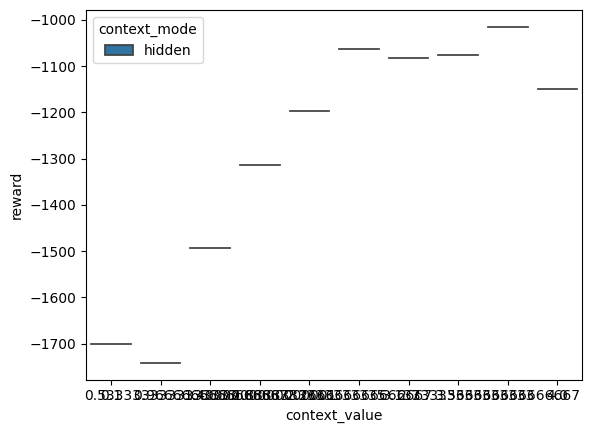

In [5]:
base_dir = "../results/hydra/single_run/2024-02-02/17-24-54"
# in that dir, look for files named "sac_rewards_*.json"

# dataframe with columns: context_mode, seed, context_value, reward
import os
import json
import pandas as pd
import seaborn as sns

reward_df = pd.DataFrame(columns=["context_mode", "seed", "context_value", "reward"])

for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.startswith("sac_rewards_") and file.endswith(".json"):
            # files are named "sac_rewards_{env_id}_{context_mode}_{seed}.json"
            with open(os.path.join(root, file), "r") as f:
                data = json.load(f)
                # data is a dict with {"context_value":reward}
                context_mode = file.split("_")[3]
                seed = int(file.split("_")[-1].split(".")[0])
                for context_value, reward in data.items():
                    reward_df = reward_df._append({"context_mode": context_mode, "seed": seed, "context_value": context_value, "reward": reward}, ignore_index=True)

sns.violinplot(data=reward_df, x="context_value", y="reward", hue="context_mode")

<Axes: xlabel='context_value', ylabel='reward'>

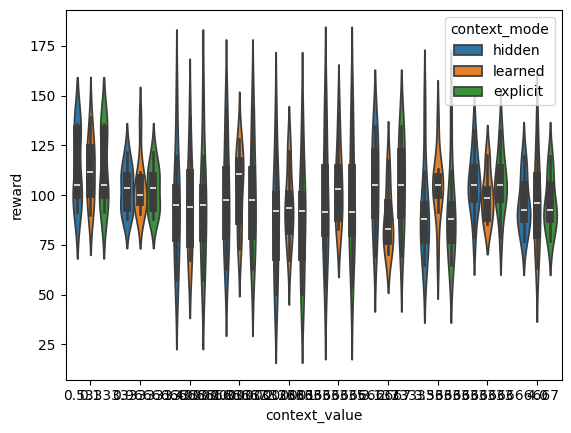